In [1]:
%config InlineBackend.figure_formats = ['retina']

In [2]:
from ipynb.fs.full.dummy_variables import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_regression, f_classif
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import statsmodels.api as sm

# ANOVA F-value For Feature Selection
https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection/notebook

In [3]:
X = data.drop(['Price/hour in USD'], axis=1)
y = data['Price/hour in USD']

X.shape

(5906, 395)

Compute the ANOVA F-value for the provided sample.

The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different.

Compare Chi-Squared Statistics

## Compare the R^2 for different number of features

In [4]:
nb_features = data.shape[1]-1 # because there we need to remove the y from the features

In [5]:
# Select Features With Best ANOVA F-Values
rsquared = []
selected_cols = {} # keys are the number of features and values are lists of the indices of the selected features
for i in range(0,nb_features,10):
    selector = SelectKBest(f_classif, k=i)
    selector.fit(X,y)
    cols = selector.get_support(indices=True)
    X_new = X.iloc[:,cols]
    X_new = X_new.assign(Intercept=1)
    model = sm.OLS(y, X_new).fit()
    rsquared.append(model.rsquared)
    selected_cols[i] = cols

Text(0, 0.5, 'R-squared')

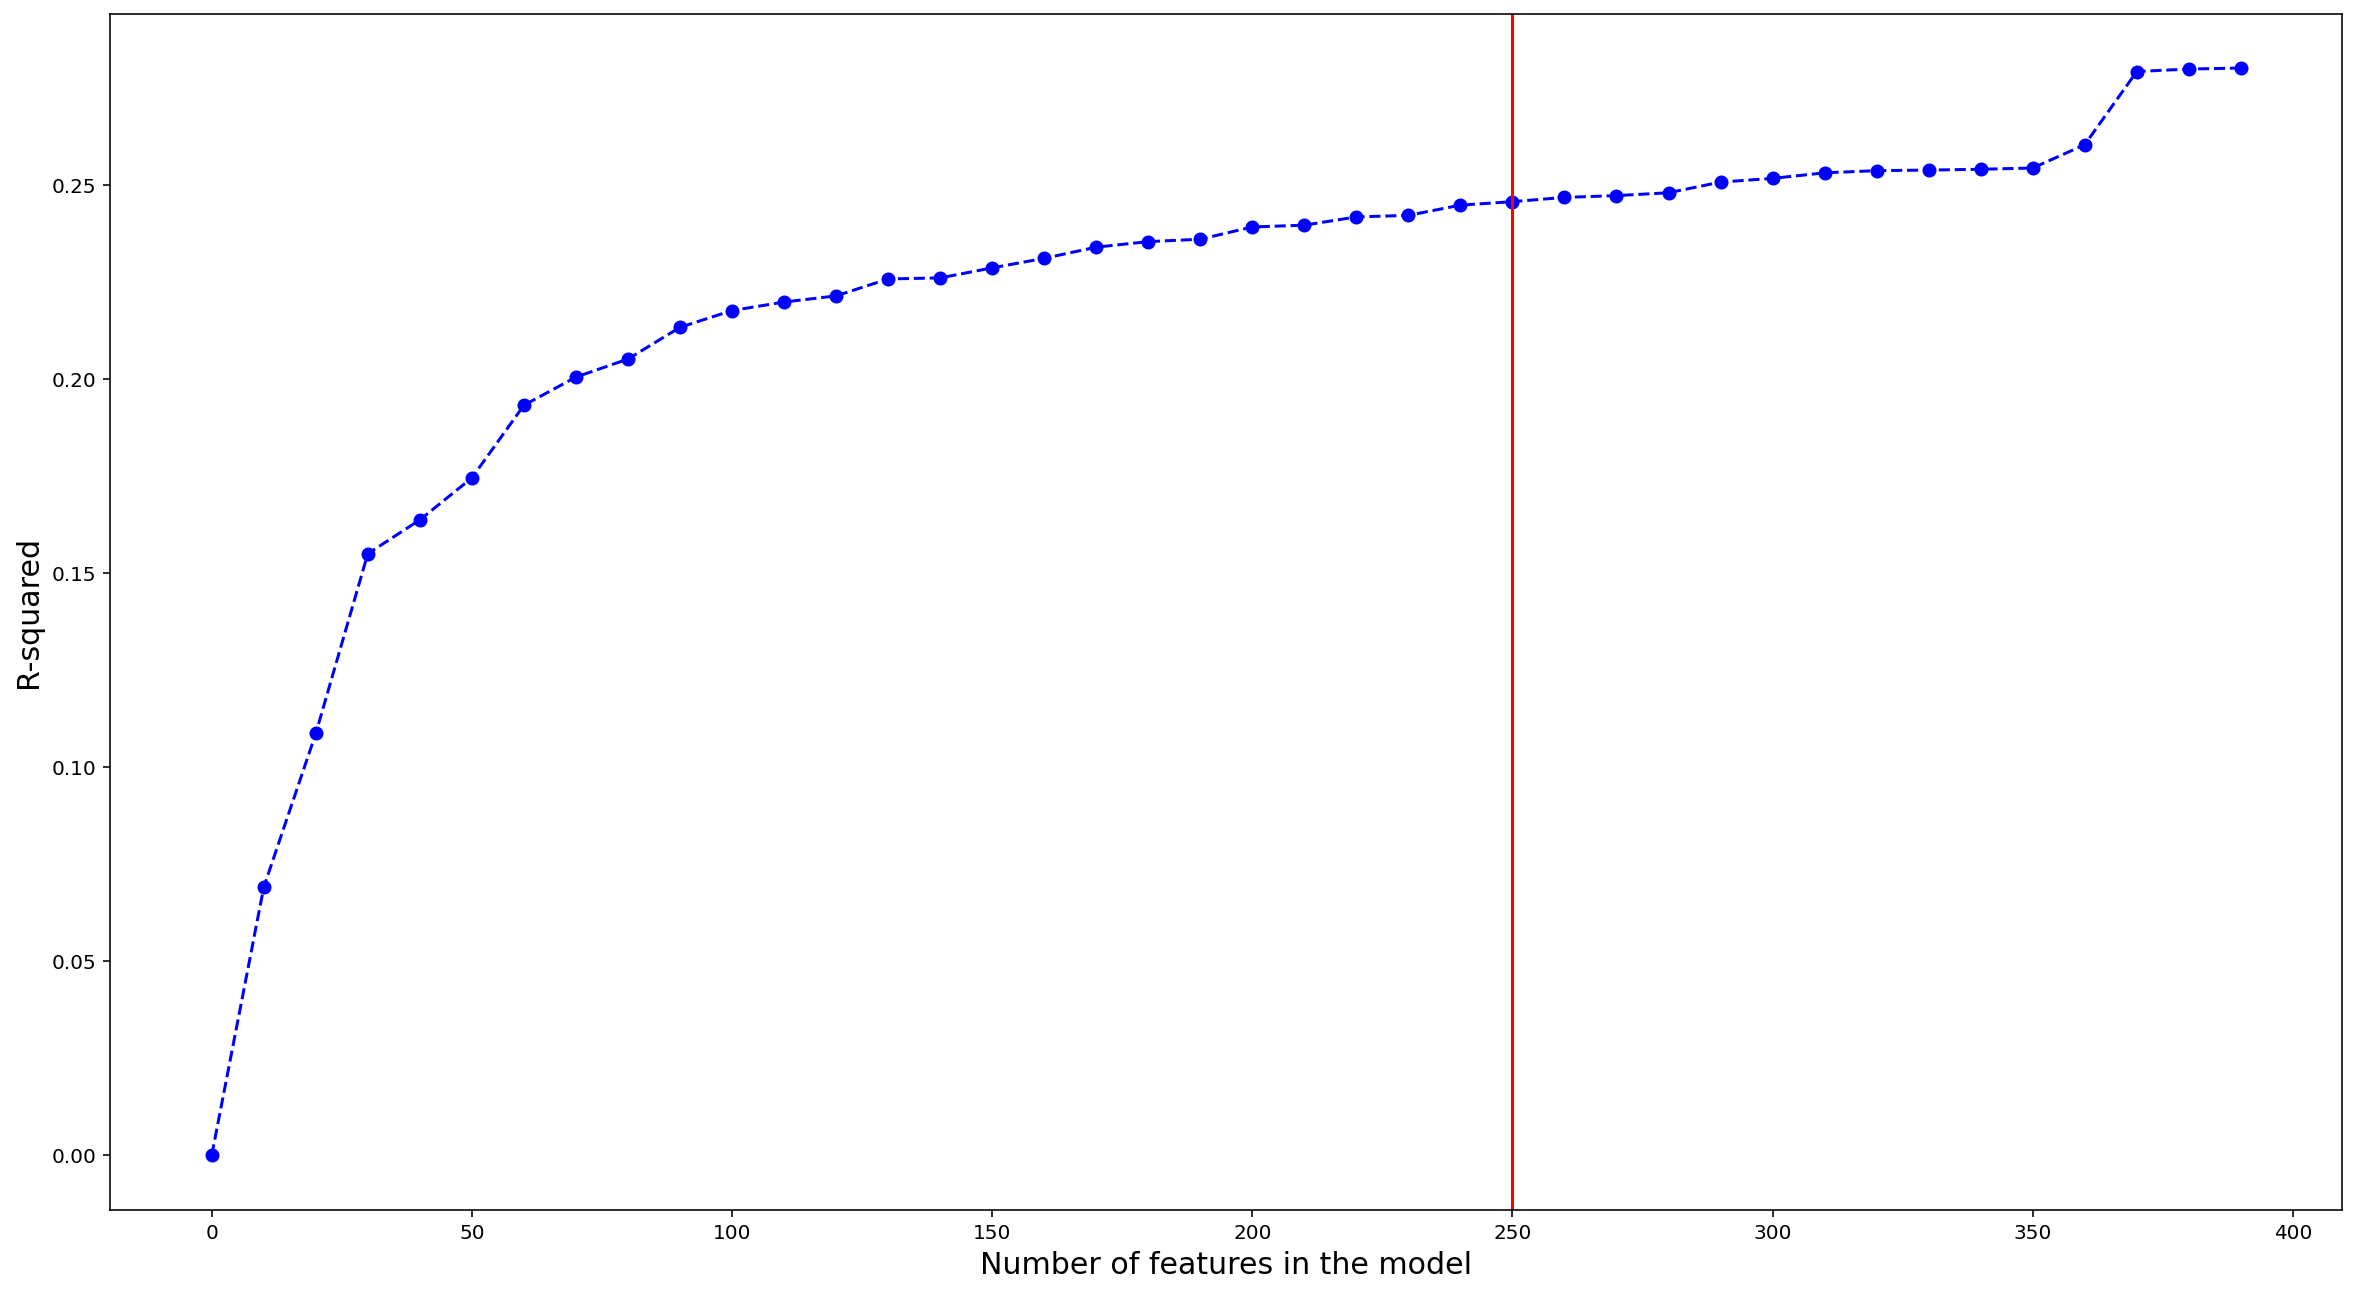

In [6]:
plt.figure(figsize=(20,11))
x = range(0,nb_features,10)
plt.plot(x,rsquared, '--', c='b', marker='o')
plt.xlabel('Number of features in the model', size=15)
plt.axvline(250, 0, 1, c='r')
plt.ylabel('R-squared', size=15)

From the plot, we can see that after 200 features, the $R^{2}$ is increasing slowly, therefore we could choose to use 250 features in our model. The selected features are as follows:

In [7]:
list(X.columns[selected_cols[250]])

['rating',
 'nb_buyers',
 'last_active',
 'gender',
 'score',
 'Algeria',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Belize',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Egypt',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Hungary',
 'India',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Kenya',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Malta',
 'Mozambique',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Pakistan',
 'Panama',
 'Philippines',
 'Portugal',
 'Romania',
 'Saudi Arabia',
 'Serbia',
 'Slovakia',
 'South Africa',
 'Spain',
 'Suriname',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'content writing',
 'proofreading',
 'blog writing',
 'copywriting',
 'creative writing',
 'editing',
 'research writing',
 'article',
 'search engine opti

# Optimization of R^2 for each feature category
The categories are: countries, skills, expertises and languages

## For the countries

In [8]:
selected_features = ['rating','nb_reviews','nb_projects','nb_buyers','last_active','gender','score']
countries_rsquared = []
x_countries = []
for country in country_dummies.columns:
    if country not in data.columns:
        continue
    selected_features += [country]
    X_cut = X[selected_features]
    X_cut = X_cut.assign(Intercept=1)
    model = sm.OLS(y,X_cut).fit()
    countries_rsquared.append(model.rsquared)
    x_countries.append(len(selected_features))

## For the skills

In [9]:
selected_features = ['rating','nb_reviews','nb_projects','nb_buyers','last_active','gender','score']
skills_rsquared = []
x_skills = []
for skill in skills_dummies.columns:
    if skill not in data.columns:
        continue
    selected_features += [skill]
    X_cut = X[selected_features]
    X_cut = X_cut.assign(Intercept=1)
    model = sm.OLS(y,X_cut).fit()
    skills_rsquared.append(model.rsquared)
    x_skills.append(len(selected_features))

## For the industry expertises

In [10]:
selected_features = ['rating','nb_reviews','nb_projects','nb_buyers','last_active','gender','score']
exper_rsquared = []
x_exper = []
for exper in exper_dummies.columns:
    if exper not in data.columns:
        continue
    selected_features += [exper]
    X_cut = X[selected_features]
    X_cut = X_cut.assign(Intercept=1)
    model = sm.OLS(y,X_cut).fit()
    exper_rsquared.append(model.rsquared)
    x_exper.append(len(selected_features))

## For the languages

In [11]:
selected_features = ['rating','nb_reviews','nb_projects','nb_buyers','last_active','gender','score']
lang_rsquared = []
x_lang = []
for lang in languages_dummies.columns:
    if lang not in data.columns:
        continue
    selected_features += [lang]
    X_cut = X[selected_features]
    X_cut = X_cut.assign(Intercept=1)
    model = sm.OLS(y,X_cut).fit()
    lang_rsquared.append(model.rsquared)
    x_lang.append(len(selected_features))

## Plot of the results

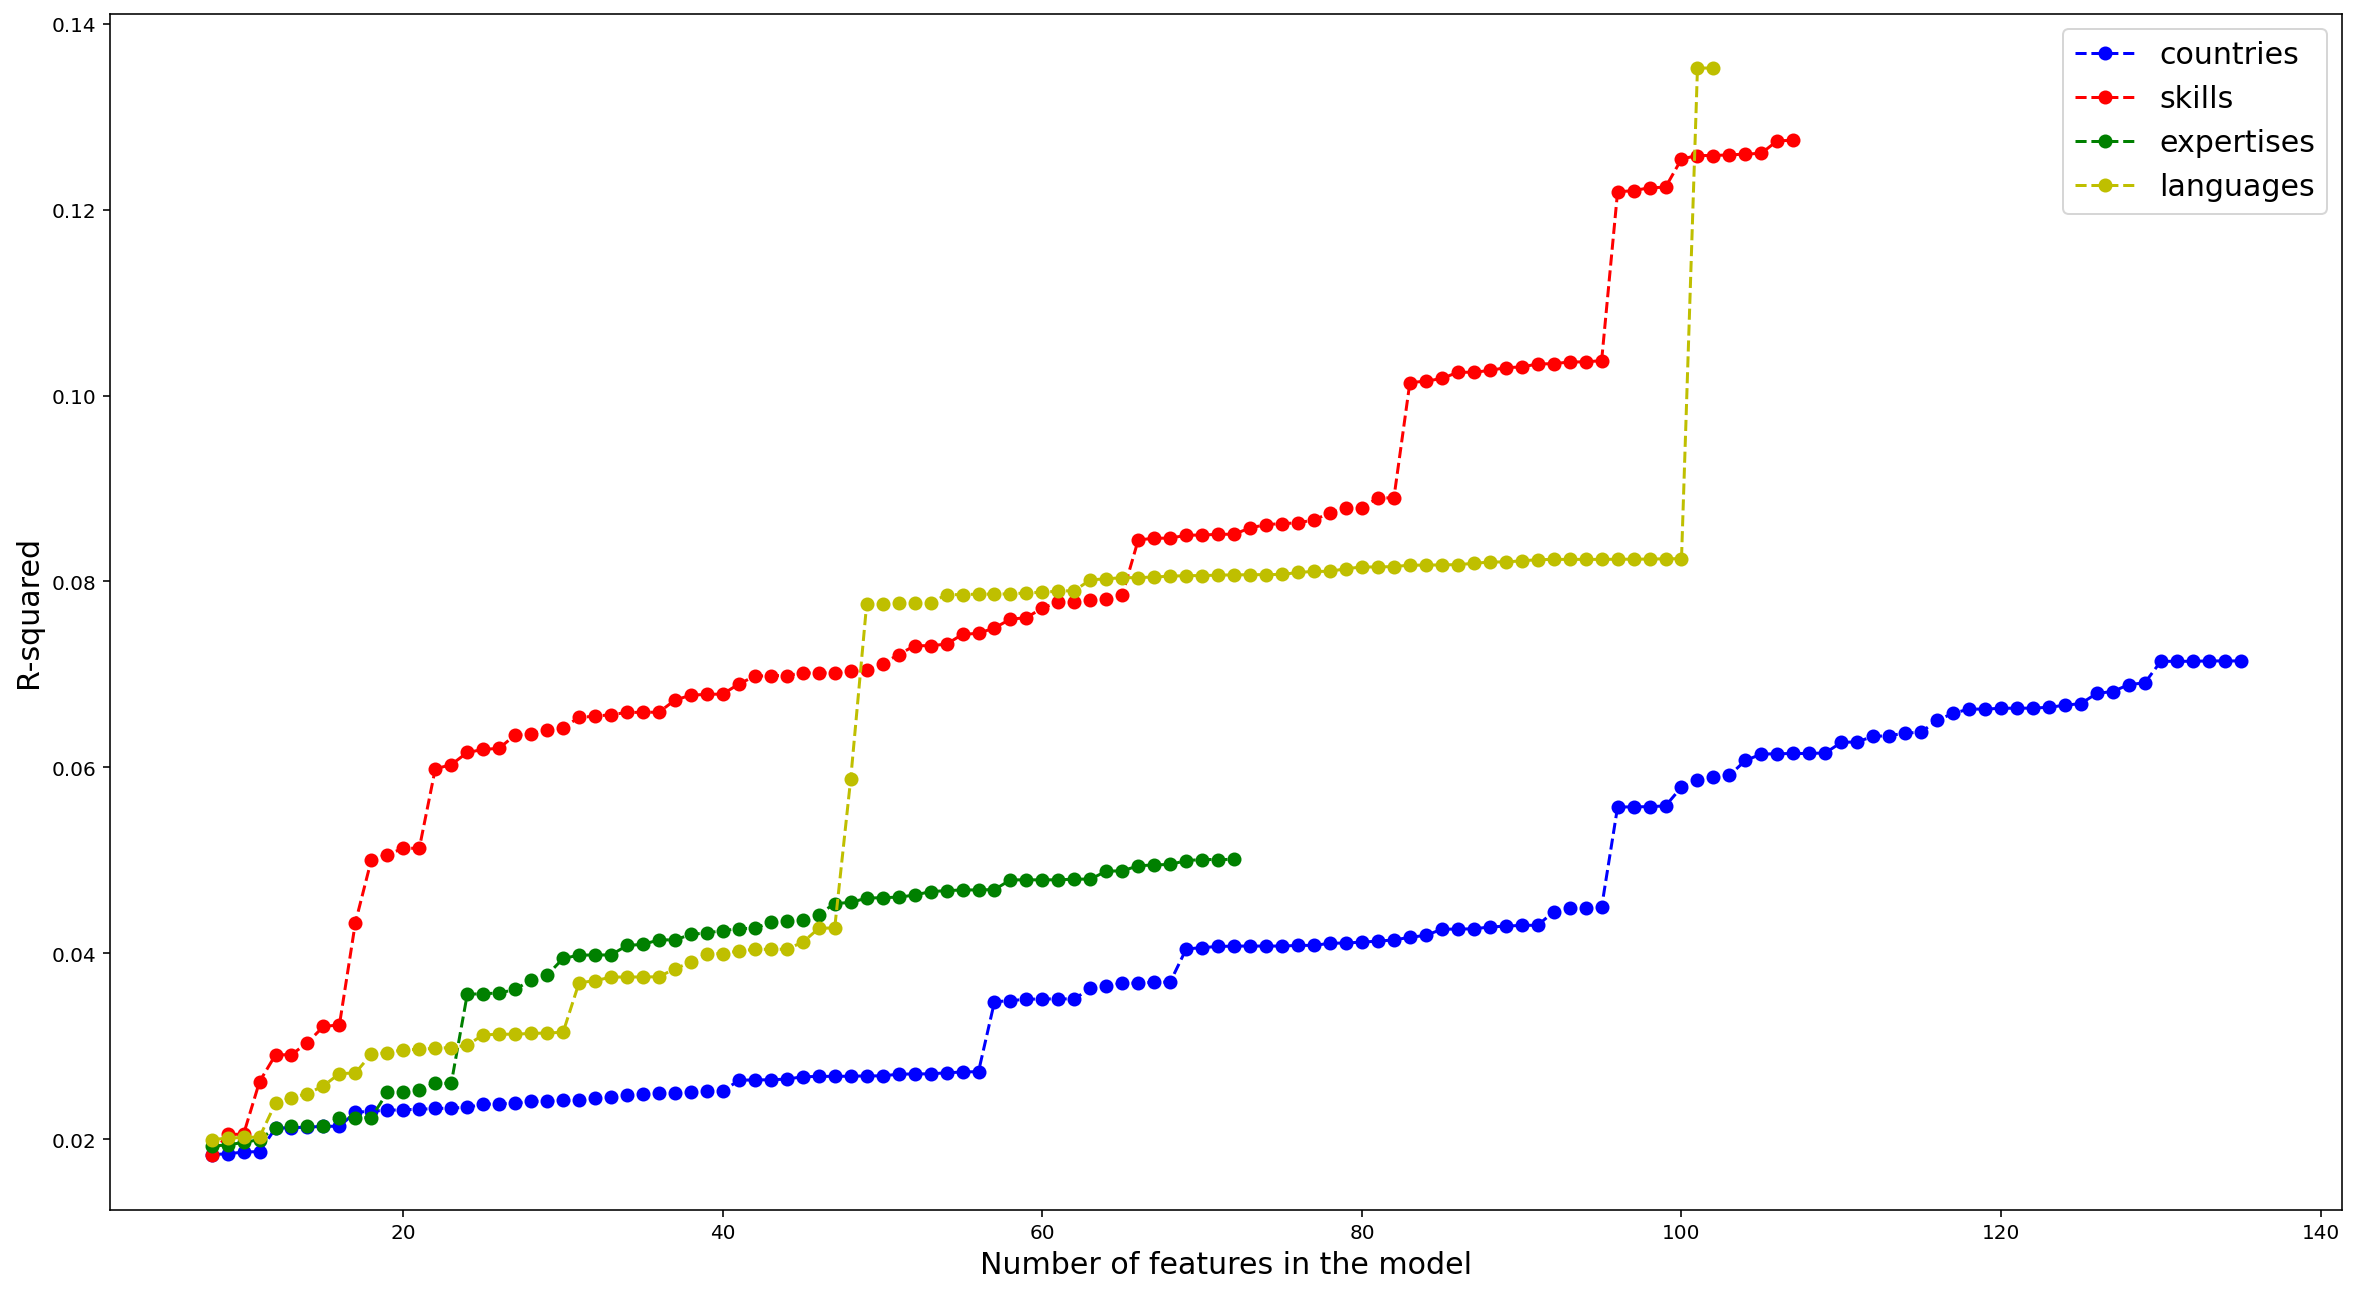

In [12]:
plt.figure(figsize=(20,11))
plt.plot(x_countries,countries_rsquared, '--', c='b', marker='o', label='countries')
plt.plot(x_skills,skills_rsquared, '--', c='r', marker='o', label='skills')
plt.plot(x_exper,exper_rsquared, '--', c='g', marker='o', label='expertises')
plt.plot(x_lang,lang_rsquared, '--', c='y', marker='o', label='languages')
plt.xlabel('Number of features in the model', size=15)
plt.ylabel('R-squared', size=15)
plt.legend(fontsize=15)

# Regression with the 250 best features

In [13]:
X_best = X.iloc[:,selected_cols[250]]
X_best = X_best.assign(Intercept=1)

In [14]:
model = sm.OLS(y,X_best).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Price/hour in USD   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     7.490
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          3.73e-202
Time:                        17:50:46   Log-Likelihood:                -28603.
No. Observations:                5906   AIC:                         5.770e+04
Df Residuals:                    5659   BIC:                         5.935e+04
Df Model:                         246                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [15]:
X_best.corr()

,rating,nb_buyers,last_active,gender,score,Algeria,Argentina,Australia,Austria,Belgium,...,Igbo,Hungarian,Tamil,Telugu,Estonian,Thai,Nynorsk,Akan,Khmer,Intercept
rating,1.000000,0.021951,-0.037702,0.029725,0.271395,0.001812,-0.011510,-0.014936,0.004352,-0.019016,...,-0.046386,-0.023285,0.007380,0.000764,0.004458,-0.001398,0.003152,0.004458,-0.008558,NaN
nb_buyers,0.021951,1.000000,0.121746,-0.011675,0.473982,0.003408,-0.005449,-0.005291,-0.006509,-0.008954,...,-0.006779,-0.002271,-0.007827,-0.003965,-0.001986,-0.001544,-0.002922,-0.004439,-0.003139,NaN
last_active,-0.037702,0.121746,1.000000,-0.050581,0.206404,0.013788,0.027370,-0.019421,-0.023600,0.007707,...,0.013788,-0.006410,0.003544,0.002044,-0.002420,0.010361,0.011414,-0.002420,0.011414,NaN
gender,0.029725,-0.011675,-0.050581,1.000000,-0.021573,0.001353,0.005161,0.013474,-0.004464,-0.009961,...,-0.010431,-0.000554,-0.004464,0.001353,0.015758,-0.030275,-0.015200,-0.002870,-0.015200,NaN
score,0.271395,0.473982,0.206404,-0.021573,1.000000,0.015653,0.006080,0.000040,-0.009368,-0.008633,...,-0.026548,-0.011929,0.007056,0.004185,0.004974,0.002601,-0.008053,-0.016883,-0.014326,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thai,-0.001398,-0.001544,0.010361,-0.030275,0.002601,-0.001003,-0.002291,-0.003052,-0.001738,-0.002200,...,-0.001003,-0.001679,-0.001738,-0.001003,-0.000634,1.000000,-0.000448,-0.000634,0.377772,NaN
Nynorsk,0.003152,-0.002922,0.011414,-0.015200,-0.008053,-0.000379,-0.000865,-0.001153,-0.000657,-0.000831,...,-0.000379,-0.000634,-0.000657,-0.000379,-0.000240,-0.000448,1.000000,-0.000240,-0.000169,NaN
Akan,0.004458,-0.004439,-0.002420,-0.002870,-0.016883,-0.000536,-0.001224,-0.001631,-0.000929,-0.001176,...,-0.000536,-0.000897,-0.000929,-0.000536,-0.000339,-0.000634,-0.000240,1.000000,-0.000240,NaN
Khmer,-0.008558,-0.003139,0.011414,-0.015200,-0.014326,-0.000379,-0.000865,-0.001153,-0.000657,-0.000831,...,-0.000379,-0.000634,-0.000657,-0.000379,-0.000240,0.377772,-0.000169,-0.000240,1.000000,NaN


In [60]:
X_corr = X_best.drop('Intercept', axis=1)
test = np.array(X_corr.corr()-np.eye(X_corr.corr().shape[0]))
names = X_corr.columns

In [67]:
indices = np.argmax(test,axis=0)
values = np.max(test,axis=0)
for i,el in enumerate(values):
    if el>0.8:
        print('{} and {} are highly correlated: {}'.format(names[i], names[indices[i]], round(el,3)))

Financial and Services are highly correlated: 1.0
Services and Financial are highly correlated: 1.0
Human and Resources are highly correlated: 1.0
Resources and Human are highly correlated: 1.0
Real and Estate are highly correlated: 1.0
Estate and Real are highly correlated: 1.0
Public and Utilities are highly correlated: 1.0
Utilities and Public are highly correlated: 1.0
Online and Security are highly correlated: 0.908
Security and Online are highly correlated: 0.908
